# K-Nearest Neighbours Algorithm

- Its calculated as a result of performing a distance measurement by comparing data of an unknown class with other data in the training set.

- It is expressed as the data classification that has yet to be assigned to a class according to the distance by setting it to the most ideal class.

- Function: 

    - classify values for each value by creating a classifier over the set of nearest neighbors to the corresponding value.

- **Types of KNN**

    1. euclidean
   
    2. mahalanobis
   
    3. manahattan
   
    4. haversiene
   
    5. chebyshev
   
    6. levenshtein
   
    7. hamming
   
    8. sorensen-dice
   
    9. MINKOWSKI
   
    10. jacckard

**Parameters in KNN**

1. n_neighbours

2. weights = 'uniform'

3. algorithm = 'auto'

4. leaf_size = 30

5. p = 2

6. metrics = "minkowski"

7. metric_params = None

8. n_jobs = None

**Advantages**

1. data training operations are more accessible than anyother

2. processes and analyzes can be followed analytically/ numerically

3. easy to implement 

4. effective against complex or complex (noise) training data

5. easy to implement

6. training can be performed using small_number of parameters

**Disadvantages**

1. high transaction volume and high amount of steps, will need very high performance hardware

2. its expensive 

3. takes along time due to number of steps and transactions is high

4. finding the algorithim takes  a long time in certain periods

# Import the Libraies

1. Numpy

2. Pandas

3. Matplotlib

4. Seaborn

5. Warnings

In [136]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import warnings

warnings.filterwarnings ('ignore')

In [137]:
#Load the dataset
data = pd.read_csv("teleCust1000t.csv")

data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# Data Cleaning # 

- Create a loop to show the datasets details, inorder to gain a deeper understanding.

In [138]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print("---------")

region
region
3    344
2    334
1    322
Name: count, dtype: int64
---------
tenure
tenure
72    31
24    20
48    20
3     20
13    19
      ..
36     7
2      7
47     7
21     6
63     6
Name: count, Length: 72, dtype: int64
---------
age
age
33    39
39    35
35    34
31    32
34    32
37    31
40    28
42    28
30    26
52    25
36    25
54    24
45    24
43    24
27    24
48    24
46    24
41    24
51    23
25    23
50    23
28    22
26    21
55    21
47    21
32    21
38    21
24    20
57    20
44    20
29    19
53    19
49    18
23    16
22    15
59    14
63    12
56    11
61    11
60    11
64    10
20    10
58    10
62     9
21     8
66     7
68     6
69     6
65     6
67     5
19     4
76     3
70     3
75     2
71     1
72     1
74     1
77     1
18     1
73     1
Name: count, dtype: int64
---------
marital
marital
0    505
1    495
Name: count, dtype: int64
---------
address
address
1     68
2     66
4     61
3     61
0     56
7     53
5     50
9     41
8     39
10    38
12

# Drop Columns 

- The following columns will be dropped due to their ambugiuity:

    1. ed
    2. employ

In [139]:
data.drop(['ed','employ'],axis=1,inplace=True)
data.head()

,region,tenure,age,marital,address,income,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,0.0,0,2,1
1,3,11,33,1,7,136.0,0.0,0,6,4
2,3,68,52,1,24,116.0,0.0,1,2,3
3,2,33,33,0,12,33.0,0.0,1,1,1
4,2,23,30,1,9,30.0,0.0,0,4,3


# Explatory Data Analysis

- Find a relatinship between amongst the variables using a heatmap

- The dataframe will conduct a correalation matrix on the first column which "region", reorder the column with custcat being the first variable.

    - Use the .reindex() to rearrange the columns order.

In [140]:
desired_order = ['custcat', 'region', 'tenure', 'age', 'marital', 
                 'address', 'income', 'retire', 'gender', 'reside']

data_reordered = data.reindex(columns=desired_order)

data_reordered.head()


,custcat,region,tenure,age,marital,address,income,retire,gender,reside
0,1,2,13,44,1,9,64.0,0.0,0,2
1,4,3,11,33,1,7,136.0,0.0,0,6
2,3,3,68,52,1,24,116.0,0.0,1,2
3,1,2,33,33,0,12,33.0,0.0,1,1
4,3,2,23,30,1,9,30.0,0.0,0,4


<Axes: >

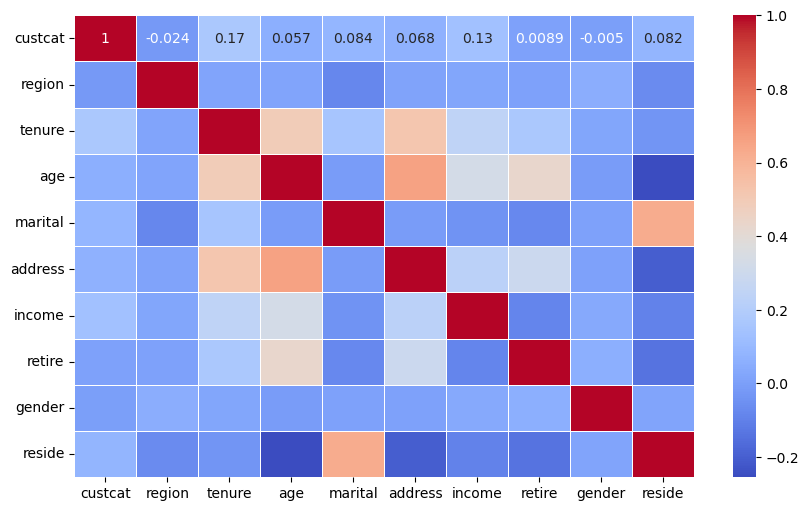

In [141]:
correlation_matrix = data_reordered.corr()
plt.figure(figsize=(10,6))

sns.heatmap(correlation_matrix,annot=True,linewidths=0.5,cmap='coolwarm')

# Drop variables with low correlation

1. The "retire" variable has a low correlation of 0.0089
2. "gender" also has a low correaltion of -0.005

In [142]:
data.drop(['retire','gender'],axis=1,inplace=True)

data.head()

,region,tenure,age,marital,address,income,reside,custcat
0,2,13,44,1,9,64.0,2,1
1,3,11,33,1,7,136.0,6,4
2,3,68,52,1,24,116.0,2,3
3,2,33,33,0,12,33.0,1,1
4,2,23,30,1,9,30.0,4,3


# Binary Conversion

1. Using pd.getdummies() to convert the data into binary form 

2. Drop the original variables

In [143]:
region = pd.get_dummies(data['region'],drop_first=True,prefix="region")
reside = pd.get_dummies(data['reside'],drop_first=True,prefix="reside")

In [144]:
data.drop(['region','reside'],axis=1,inplace=True)
data.head()

,tenure,age,marital,address,income,custcat
0,13,44,1,9,64.0,1
1,11,33,1,7,136.0,4
2,68,52,1,24,116.0,3
3,33,33,0,12,33.0,1
4,23,30,1,9,30.0,3


# Add the new columns using .concat()

In [145]:
data = pd.concat([data,region,reside],axis=1)

data.head()

,tenure,age,marital,address,income,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8
0,13,44,1,9,64.0,1,True,False,True,False,False,False,False,False,False
1,11,33,1,7,136.0,4,False,True,False,False,False,False,True,False,False
2,68,52,1,24,116.0,3,False,True,True,False,False,False,False,False,False
3,33,33,0,12,33.0,1,True,False,False,False,False,False,False,False,False
4,23,30,1,9,30.0,3,True,False,False,False,True,False,False,False,False


# Standardization Process

- Its a feature scaling technqui
 
- Some machine learning algorithims are distance sensitive.

- It uses the mean and standard deviation

- When an algorithims is distance sensitive its nessacary to standardize the variables.

- It allows data to be processed without damaging the information.

# Standardization Using Scaler

- import the libray

    from sklearn.preprocessing import StandardScaler

- Scaler: makes mean of the variable 0 and the standard deviation 1. It brings the normal distribution closer to normal

**Drop the values that are not in binary format**

1. tenure

2. age

3. address

4. income


In [146]:
from sklearn.preprocessing import StandardScaler

scaled_variables = data[['tenure','age','address','income']]

scaled_variables

,tenure,age,address,income
0,13,44,9,64.0
1,11,33,7,136.0
2,68,52,24,116.0
3,33,33,12,33.0
4,23,30,9,30.0
...,...,...,...,...
995,10,39,0,27.0
996,7,34,2,22.0
997,67,59,40,944.0
998,70,49,18,87.0


**Create a standardization Object**

In [147]:
scaler = StandardScaler()

In [148]:
#Fit the scaled_variables
scaler.fit(scaled_variables)

StandardScaler()

In [149]:
#transform the data after standardization
scaled_variables = scaler.transform(scaled_variables)

In [150]:
data_scaled = pd.DataFrame(scaled_variables,columns= ['tenure','age','address','income'])

data_scaled.head()

,tenure,age,address,income
0,-1.055125,0.184505,-0.253034,-0.126506
1,-1.148806,-0.691812,-0.451415,0.546450
2,1.521092,0.821826,1.234819,0.359517
3,-0.118319,-0.691812,0.044536,-0.416251
4,-0.586722,-0.930808,-0.253034,-0.444291


In [151]:
data.drop(['tenure','age','address','income'],axis=1,inplace=True)

In [152]:
data = pd.concat([data,data_scaled],axis=1)
#always put data.head()
data.head()

,marital,custcat,region_2,region_3,reside_2,reside_3,reside_4,reside_5,reside_6,reside_7,reside_8,tenure,age,address,income
0,1,1,True,False,True,False,False,False,False,False,False,-1.055125,0.184505,-0.253034,-0.126506
1,1,4,False,True,False,False,False,False,True,False,False,-1.148806,-0.691812,-0.451415,0.546450
2,1,3,False,True,True,False,False,False,False,False,False,1.521092,0.821826,1.234819,0.359517
3,0,1,True,False,False,False,False,False,False,False,False,-0.118319,-0.691812,0.044536,-0.416251
4,1,3,True,False,False,False,True,False,False,False,False,-0.586722,-0.930808,-0.253034,-0.444291


# K-Nearest Neighbours Algorithim Modelling

- The data has been standardized and is ready for modelling using the *KNeighbourClassifier*

In [153]:
from sklearn.model_selection import train_test_split
#create the X and y variables
X = data.drop(["custcat"],axis=1)
y = data['custcat']

In [154]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**We can confirm whether the data has been split correctly using the .shape method**

In [155]:
print("Train Set:", X_train.shape, y_train.shape)

print("Test Set:", X_test.shape, y_test.shape)




Train Set: (800, 14) (800,)
Test Set: (200, 14) (200,)


**20% is test and 80% is train. The data has been split correctly.**

# Create the model using a KNeighboursClassifier Algorithim

- from sklearn.neighbours import KNeighboursClassifier 

- **Note: When working with Linear Regression use the KNeighborsRegressor Algorithim**

In [156]:
from sklearn.neighbors import KNeighborsClassifier  

**Assign a variable to the k object.**

In [157]:
k=4

**Create a KNeighbours Object Equivalent to the Classifier algorithim.**

In [158]:
knn_model = KNeighborsClassifier(n_neighbors=k)

knn_model

KNeighborsClassifier(n_neighbors=4)

**Fit the data to the Classifier**

In [159]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

**Create a prediction model**

In [160]:
y_pred = knn_model.predict(X_test)

In [161]:
y_pred

array([3, 3, 3, 3, 3, 4, 3, 2, 4, 4, 1, 2, 4, 3, 1, 1, 3, 2, 3, 1, 1, 2,
       3, 3, 4, 3, 2, 2, 4, 3, 1, 1, 3, 4, 2, 1, 1, 1, 4, 1, 3, 2, 3, 3,
       3, 3, 1, 1, 4, 3, 1, 3, 1, 1, 4, 4, 4, 1, 1, 1, 4, 2, 1, 4, 1, 2,
       1, 3, 1, 3, 4, 1, 3, 2, 2, 3, 3, 1, 3, 1, 1, 1, 3, 1, 4, 1, 4, 1,
       4, 2, 2, 3, 2, 2, 3, 1, 4, 1, 3, 1, 4, 3, 2, 2, 1, 1, 4, 2, 3, 2,
       2, 1, 3, 4, 4, 1, 3, 3, 2, 4, 3, 3, 2, 3, 3, 2, 2, 2, 1, 2, 3, 4,
       4, 1, 4, 1, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 3, 1, 3, 2, 3,
       3, 3, 1, 2, 4, 1, 1, 4, 2, 4, 2, 1, 1, 2, 1, 1, 1, 3, 4, 3, 1, 1,
       3, 2, 1, 3, 3, 1, 2, 1, 3, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 3, 1, 2,
       3, 3], dtype=int64)

# Evaluation Metrics

In [162]:
from sklearn import metrics

print("Accuracy score :", metrics.accuracy_score(y_test,y_pred))

Accuracy score : 0.325


In [163]:
from sklearn.model_selection import GridSearchCV

**Create a KNeighbourClassifier object**

In [164]:
knn_model3 = KNeighborsClassifier()
knn_model3

KNeighborsClassifier()

**Create a dictionary for hyperparameters with key, value pairs**

In [169]:
knn_params = {"n_neighbors":np.arange(1,50),
            "metric":['minkowsk','euclidean','manhattan'],
            'weights':["uniform",'distance']}

knn_params            

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 'metric': ['minkowsk', 'euclidean', 'manhattan'],
 'weights': ['uniform', 'distance']}

**Create a cv_model object for the grid search CV.**

- Include the following parameters:

    1. estimator = knn_model3

    2. param_grid = knn_params

    3. cv(Cross Validation) = 10


In [172]:
knn_cv_model = GridSearchCV(estimator=knn_model3,param_grid=knn_params,cv=10)

knn_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowsk', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

# Find the best parameter

- Use the .best_params_ method

In [173]:
knn_cv_model.best_params_

{'metric': 'euclidean', 'n_neighbors': 15, 'weights': 'uniform'}

**Fit the new model**

In [174]:
knn_cv_model.fit(X_train,y_train)    

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['minkowsk', 'euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']})

In [175]:
knn_tunned = KNeighborsClassifier(n_neighbors=15)

In [176]:
knn_tunned.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

**Predict the X_test**

In [177]:
y_pred = knn_tunned.predict(X_test)

In [178]:
print('Accuracy Score:',metrics.accuracy_score(y_test,y_pred))

Accuracy Score: 0.35
